In [29]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

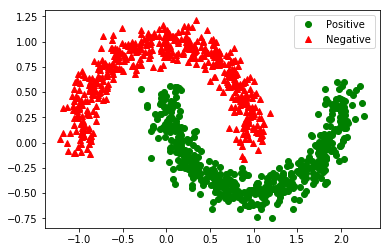

In [8]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

In [22]:
X_moons.shape, y_moons.shape

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [24]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [25]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [27]:
n_inputs = 2

In [31]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1 / (1 + tf.exp(-logits))

In [33]:
y_proba = tf.sigmoid(logits)

In [35]:
loss = tf.losses.log_loss(y, y_proba)  # uses epsilon = 1e-7 by default

In [37]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [39]:
init = tf.global_variables_initializer()

In [41]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

('Epoch:', 0, '\tLoss:', 0.87535417)
('Epoch:', 100, '\tLoss:', 0.35160163)
('Epoch:', 200, '\tLoss:', 0.3110759)
('Epoch:', 300, '\tLoss:', 0.29452419)
('Epoch:', 400, '\tLoss:', 0.28623161)
('Epoch:', 500, '\tLoss:', 0.28123608)
('Epoch:', 600, '\tLoss:', 0.27846265)
('Epoch:', 700, '\tLoss:', 0.27678668)
('Epoch:', 800, '\tLoss:', 0.27581608)
('Epoch:', 900, '\tLoss:', 0.27512029)
